In [1]:
import pandas as pd
import sklearn.manifold
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'vectors.txt'
word2vec_output_file = 'converted.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

(20804, 50)

In [3]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)
model.wv.most_similar('king')

[('abdullah', 0.7701939344406128),
 ('luther', 0.7143048048019409),
 ('prince', 0.6720150709152222),
 ('gyanendra', 0.6698442101478577),
 ('fahd', 0.6311111450195312),
 ('solzhenitsyn', 0.6225301623344421),
 ('gul', 0.6219324469566345),
 ('hugo', 0.617109477519989),
 ('jr', 0.615075945854187),
 ('fahad', 0.6120444536209106)]

In [6]:
# Visualization using tsne plots:
## converting into suitable dimensions for plotting
# Reduce dimensions to 2 to visualize the data
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
all_word_vectors_matrix = model.wv.vectors
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

# Creating a dataframe with all the words and their coordinates for a manual
# visualization in converted dimensions.
points = pd.DataFrame([
    (word, coords[0], coords[1])
    for word, coords in [
        (word, all_word_vectors_matrix_2d[model.wv.vocab[word].index])
        for word in model.wv.vocab
    ]
],
    columns=["word", "x", "y"]
)
points.head(10)

word          x          y
0   the  43.450291  11.929292
1    of  43.544540  11.956672
2    to  41.947781   9.360462
3   and  43.482834  12.289244
4    in  43.436749  12.218310
5     a  42.297283  11.858970
6    is  42.415211  11.464091
7  that  42.696068  11.429273
8     s  45.399025  11.942834
9   for  43.197300  12.614532

<AxesSubplot:title={'center':'Complete embedding space TSNE plot'}, xlabel='x', ylabel='y'>

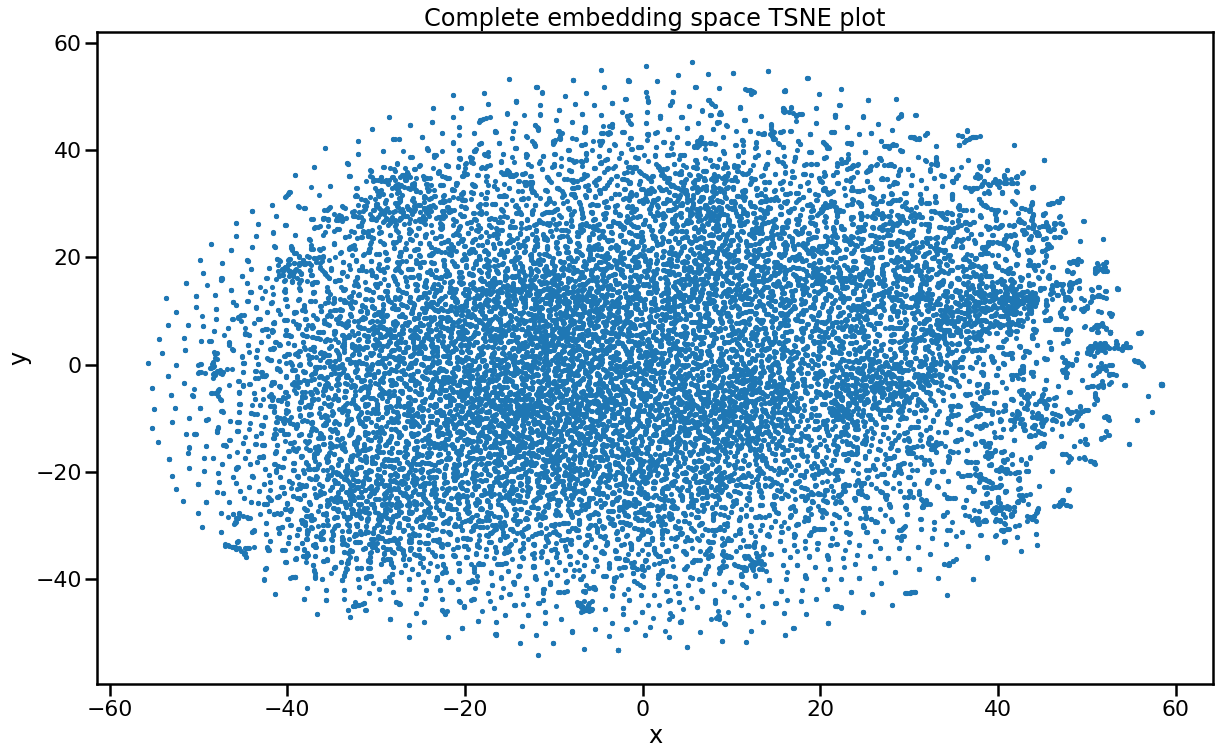

In [7]:
# tsne plot
sns.set_context("poster")
points.plot.scatter("x", "y", s=10, figsize=(20, 12), title="Complete embedding space TSNE plot")

In [8]:
# Preparing data to use for most similar TSNE plots.
keys = ['king', 'pakistan', 'majority', 'stability', 'alignment', 'post', 'civilian', 'intelligence',
'disoriented', 'murder', 'languished', 'exile', 'politics', 'bowing', 'nuclear', 'operations']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [9]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

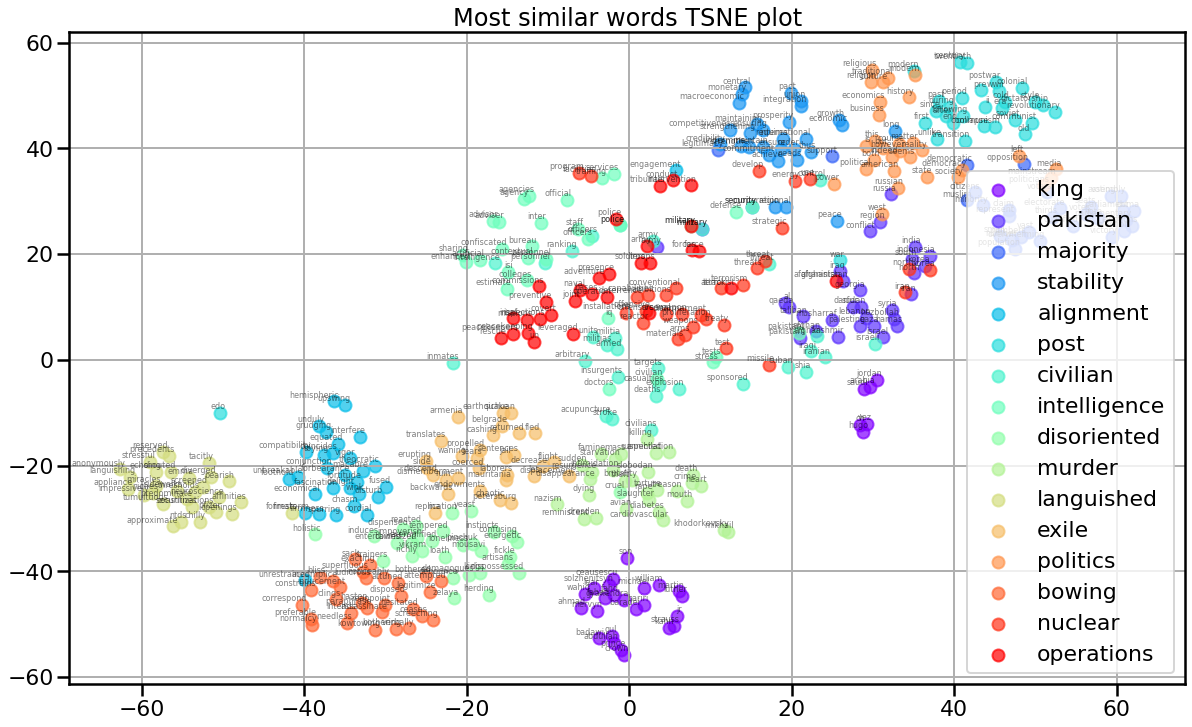

In [15]:
import matplotlib.cm as cm
%matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(20, 12))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=np.array([color]), alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Most similar words TSNE plot', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_tsne_glove.png')

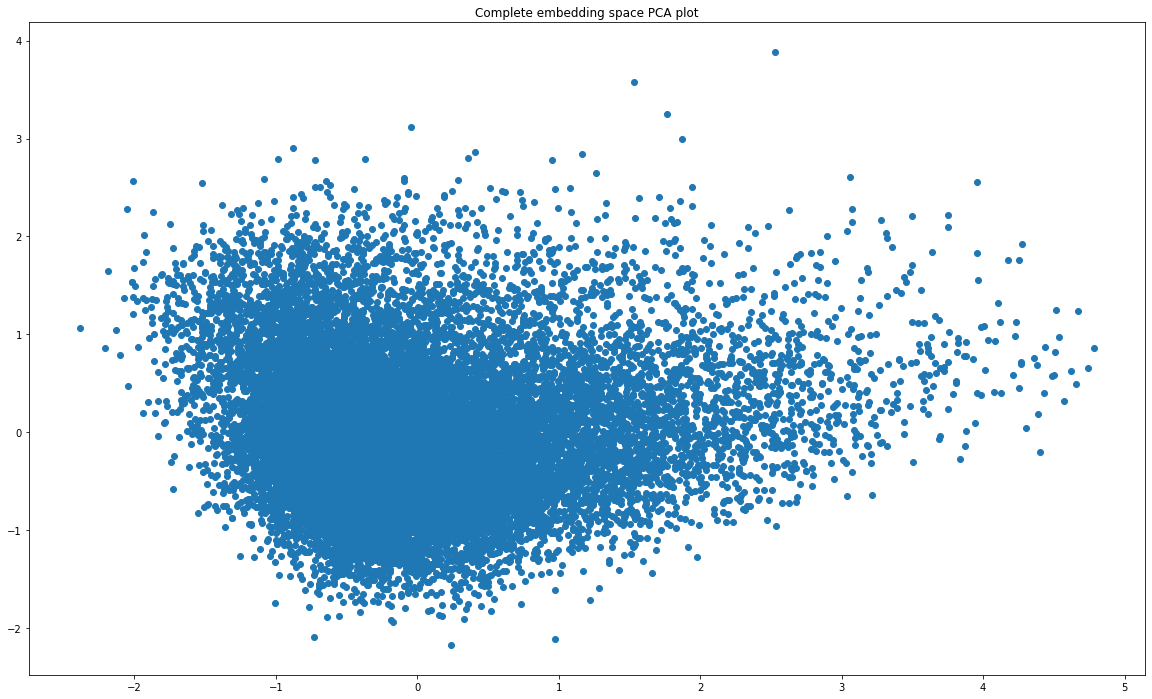

In [4]:
# PCA visuallization
from sklearn.decomposition import PCA
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize=(20,12))
plt.title("Complete embedding space PCA plot")
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
plt.show()

In [11]:
from sklearn.decomposition import PCA
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
pca_model_en_2d = PCA(n_components=2)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

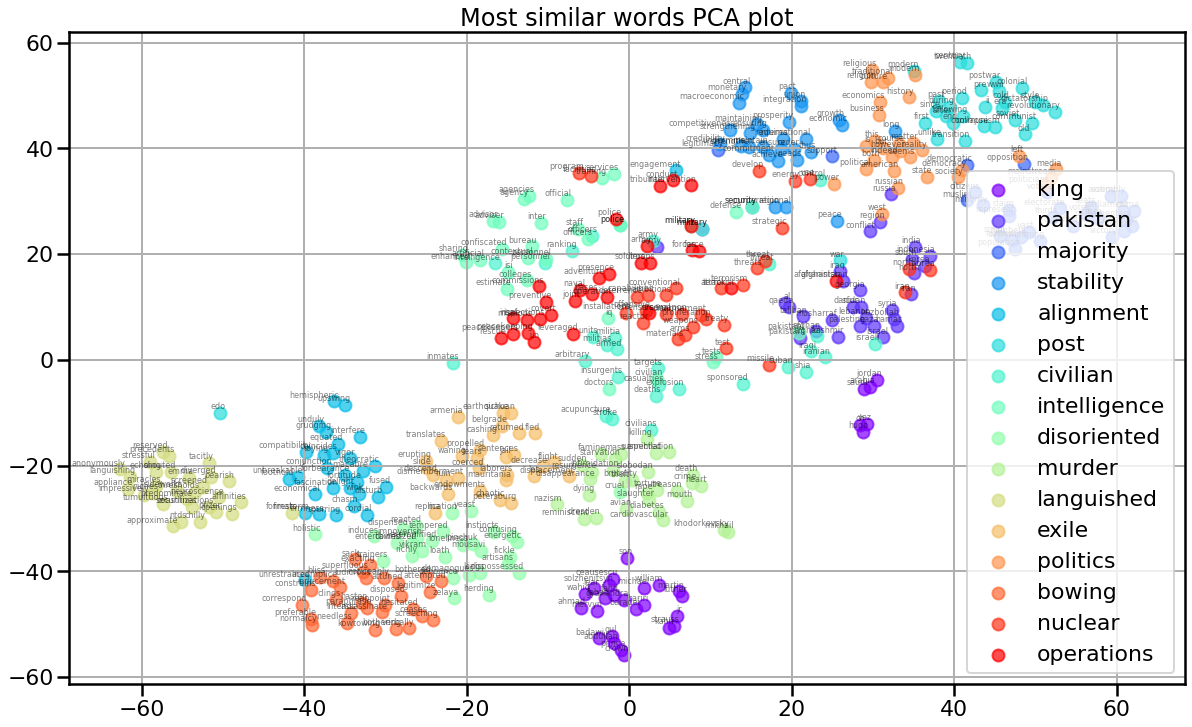

In [13]:
def pca_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(20, 12))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=np.array([color]), alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


pca_plot_similar_words('Most similar words PCA plot', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_pca_glove.png')